In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
560,ham,Hi msg me:)i'm in office..,NaN,NaN,NaN
783,spam,You have an important customer service announc...,NaN,NaN,NaN
4722,ham,HELLO PEACH! MY CAKE TASTS LUSH!,NaN,NaN,NaN
4562,ham,Come around &lt;DECIMAL&gt; pm vikky..i'm ots...,NaN,NaN,NaN
5175,ham,Raji..pls do me a favour. Pls convey my Birthd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
3216,ham,Come to mahal bus stop.. &lt;DECIMAL&gt;
1432,ham,Thanks for ve lovely wisheds. You rock
4225,ham,"Ok thats cool. Its , just off either raglan rd..."
1448,spam,As a registered optin subscriber ur draw 4 å£1...
2167,ham,Yes.he have good crickiting mind


In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4355,ham,Great. So should i send you my account number.
735,ham,Then why no one talking to me
4254,spam,Block Breaker now comes in deluxe format with ...
3402,ham,Good night my dear.. Sleepwell&amp;Take care
2039,ham,Dont pack what you can buy at any store.like c...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# check for duplicate values
df.duplicated().sum()

403

In [11]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5169, 2)

## EDA

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

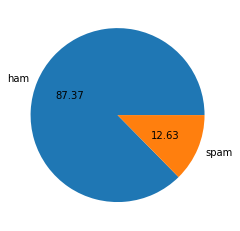

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
# Data is imbalanced

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

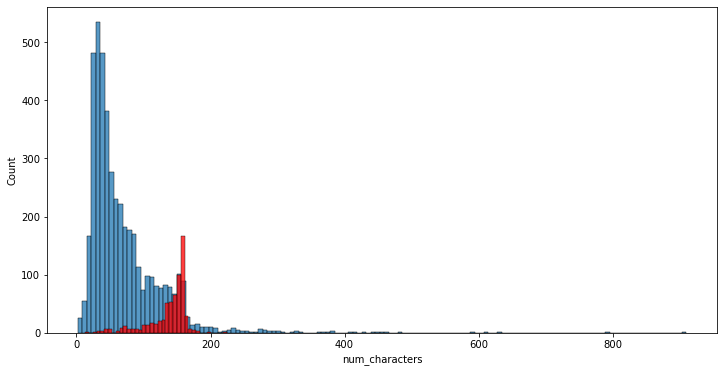

In [26]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

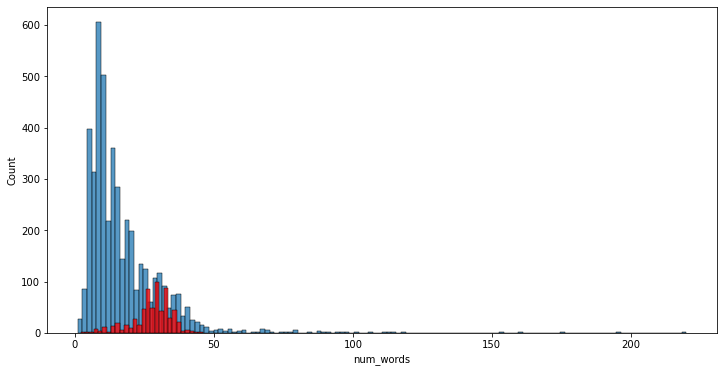

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

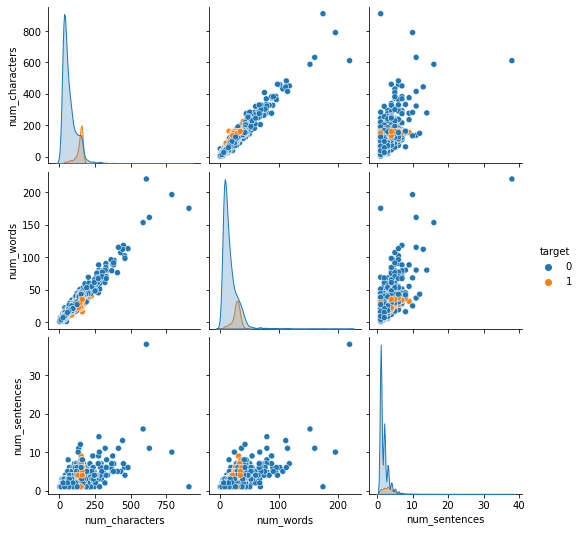

In [28]:
sns.pairplot(df,hue='target')

In [29]:
numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32'])
numeric_df

,target,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,161,35,4
5568,0,37,9,1
5569,0,57,15,2
5570,0,125,27,1


<AxesSubplot:>

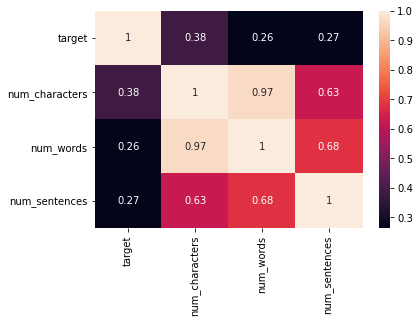

In [30]:
sns.heatmap(numeric_df.corr(),annot=True)

## Data Preprocessing

In [31]:
from nltk.corpus import stopwords
nltk.download('stopwords')

import string

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [33]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [34]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [36]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

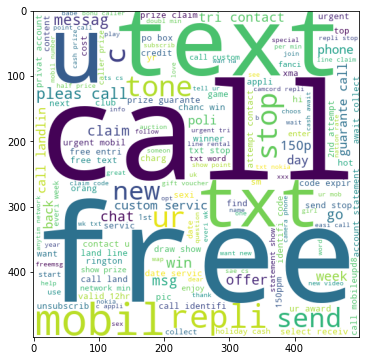

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

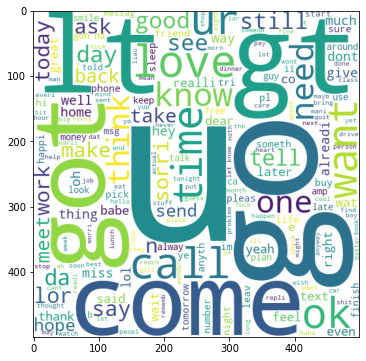

In [38]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [39]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [41]:
len(spam_corpus)

9939

In [42]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


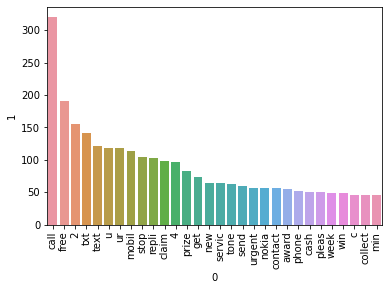

In [43]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [44]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [45]:
len(ham_corpus)

35402

In [46]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


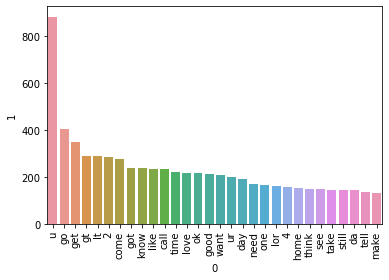

In [47]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [48]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [49]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X
#tfidf.get_feature_names()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
X.shape
# hasattr(tfidf, 'vocabulary_')
print(tfidf.vocabulary_)

{'go': 1146, 'point': 1984, 'crazi': 717, 'avail': 367, 'bugi': 509, 'great': 1175, 'world': 2936, 'la': 1465, 'buffet': 508, 'cine': 625, 'got': 1164, 'wat': 2854, 'ok': 1853, 'lar': 1477, 'joke': 1415, 'wif': 2899, 'oni': 1862, 'free': 1085, 'entri': 934, 'wkli': 2920, 'comp': 668, 'win': 2904, 'fa': 988, 'cup': 733, 'final': 1040, 'tkt': 2655, '21st': 78, 'may': 1640, 'text': 2602, 'receiv': 2122, 'question': 2078, 'std': 2466, 'txt': 2726, 'rate': 2099, 'appli': 317, 'dun': 876, 'say': 2242, 'earli': 881, 'hor': 1274, 'alreadi': 271, 'nah': 1761, 'think': 2621, 'goe': 1149, 'usf': 2787, 'live': 1535, 'around': 337, 'though': 2628, 'freemsg': 1088, 'hey': 1244, 'darl': 751, 'week': 2870, 'word': 2933, 'back': 382, 'like': 1521, 'fun': 1103, 'still': 2473, 'tb': 2576, 'xxx': 2962, 'chg': 607, 'send': 2278, 'rcv': 2102, 'even': 953, 'brother': 494, 'speak': 2427, 'treat': 2700, 'aid': 247, 'per': 1933, 'request': 2159, 'oru': 1882, 'set': 2290, 'callertun': 538, 'caller': 537, 'press'

In [51]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [54]:
#gnb = GaussianNB()
mnb = MultinomialNB()
#bnb = BernoulliNB()

In [55]:
#gnb.fit(X_train,y_train)
#y_pred1 = gnb.predict(X_test)
#print(accuracy_score(y_test,y_pred1))
#print(confusion_matrix(y_test,y_pred1))
#print(precision_score(y_test,y_pred1))

In [56]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [57]:
#bnb.fit(X_train,y_train)
#y_pred3 = bnb.predict(X_test)
#print(accuracy_score(y_test,y_pred3))
#print(confusion_matrix(y_test,y_pred3))
#print(precision_score(y_test,y_pred3))

In [58]:
# model improve
# 1. Change the max_features parameter of TfIdf
#hasattr(tfidf, 'vocabulary_')
#tfidf.get_feature_names()
#import sklearn
#!pip install scikit-learn==0.24.2
#print(sklearn.__version__)

In [59]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

pickle.dump(mnb,open('model.pkl','wb'))

In [60]:
import pickle

In [61]:
# Load and test the saved vectorizer and model
tfidf_loaded = pickle.load(open('vectorizer.pkl', 'rb'))
model_loaded = pickle.load(open('model.pkl', 'rb'))

# Verify they work correctly
sample_text = ["This"]
transformed_text = tfidf_loaded.transform(sample_text).toarray()
print(model_loaded.predict(transformed_text))

[0]


In [62]:
!pip freeze

alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.7.2
anaconda-navigator==2.0.3
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1610472525955/work
anyio @ file:///C:/ci/anyio_1620153418380/work/dist
appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1613501047216/work
astropy @ file:///C:/ci/astropy_1617745647203/work
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1615918855173/work
Babel @ file:///tmp/build/80754af9/babel_1607110387436/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.functools-lru-cache @ file:///tmp/build/80754af9/backports.functools_lru_cache_1618170165463/work
backports.shutil-get-terminal-

In [63]:
pip freeze > requirements.txt


path @ file:///C:/ci/path_1614022440181/work
pathlib==1.0.1
pathlib2 @ file:///C:/ci/pathlib2_1607025069150/work
pathspec==0.7.0
patsy==0.5.1
pep8==1.7.1
pexpect @ file:///tmp/build/80754af9/pexpect_1605563209008/work
pickleshare @ file:///tmp/build/80754af9/pickleshare_1606932040724/work
pillow==10.4.0
pkginfo==1.7.0
pluggy @ file:///C:/ci/pluggy_1615976358795/work
ply==3.11
prometheus-client @ file:///tmp/build/80754af9/prometheus_client_1618088486455/work
prompt-toolkit @ file:///tmp/build/80754af9/prompt-toolkit_1616415428029/work
psutil @ file:///C:/ci/psutil_1612298324802/work
ptyprocess @ file:///tmp/build/80754af9/ptyprocess_1609355006118/work/dist/ptyprocess-0.7.0-py2.py3-none-any.whl
py @ file:///tmp/build/80754af9/py_1607971587848/work
pycodestyle @ file:///home/ktietz/src/ci_mi/pycodestyle_1612807597675/work
pycosat==0.6.3
pycparser @ file:///tmp/build/80754af9/pycparser_1594388511720/work
pycurl==7.43.0.6
pydocstyle @ file:///tmp/build/80754af9/pydocstyle_1616182067796/wo